In [77]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score,RocCurveDisplay
from sklearn.ensemble import RandomForestClassifier

In [2]:
df= pd.read_csv('telco_features.csv')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,churn_flag,tenure_bucket,num_services,avg_monthly_charge,is_month_to_month
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,Yes,Electronic check,29.85,29.85,No,0,0-6,2,29.850000,1
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,Mailed check,56.95,1889.50,No,0,25-48,4,55.573529,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,Yes,Mailed check,53.85,108.15,Yes,1,0-6,4,54.075000,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,No,Bank transfer (automatic),42.30,1840.75,No,0,25-48,4,40.905556,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,Yes,Electronic check,70.70,151.65,Yes,1,0-6,2,75.825000,1


In [4]:
df_model = df.drop(['customerID'], axis=1)

In [5]:
cat_cols = df_model.select_dtypes(include='object').columns.tolist()

In [6]:
df_model_encoded = pd.get_dummies(df_model, columns=cat_cols, drop_first=True)

df_model_encoded.head()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,churn_flag,num_services,avg_monthly_charge,is_month_to_month,gender_Male,Partner_Yes,...,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,tenure_bucket_13-24,tenure_bucket_25-48,tenure_bucket_49+,tenure_bucket_7-12
0,0,1,29.85,29.85,0,2,29.850000,1,False,True,...,False,True,False,True,False,False,False,False,False,False
1,0,34,56.95,1889.50,0,4,55.573529,0,True,False,...,False,False,False,False,True,False,False,True,False,False
2,0,2,53.85,108.15,1,4,54.075000,1,True,False,...,False,True,False,False,True,True,False,False,False,False
3,0,45,42.30,1840.75,0,4,40.905556,0,True,False,...,False,False,False,False,False,False,False,True,False,False
4,0,2,70.70,151.65,1,2,75.825000,1,False,False,...,False,True,False,True,False,True,False,False,False,False


In [7]:
df_model_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 39 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   tenure                                 7043 non-null   int64  
 2   MonthlyCharges                         7043 non-null   float64
 3   TotalCharges                           7043 non-null   float64
 4   churn_flag                             7043 non-null   int64  
 5   num_services                           7043 non-null   int64  
 6   avg_monthly_charge                     7043 non-null   float64
 7   is_month_to_month                      7043 non-null   int64  
 8   gender_Male                            7043 non-null   bool   
 9   Partner_Yes                            7043 non-null   bool   
 10  Dependents_Yes                         7043 non-null   bool   
 11  Phon

In [8]:
df_model_encoded = df_model_encoded.drop(['Churn_Yes'], axis=1)

df_model_encoded.columns


Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'churn_flag', 'num_services', 'avg_monthly_charge', 'is_month_to_month',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'tenure_bucket_13-24', 'tenure_bucket_25-48', 'tenure_bucket_49+

In [9]:
df_model_encoded

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,churn_flag,num_services,avg_monthly_charge,is_month_to_month,gender_Male,Partner_Yes,...,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_bucket_13-24,tenure_bucket_25-48,tenure_bucket_49+,tenure_bucket_7-12
0,0,1,29.85,29.85,0,2,29.850000,1,False,True,...,False,False,True,False,True,False,False,False,False,False
1,0,34,56.95,1889.50,0,4,55.573529,0,True,False,...,True,False,False,False,False,True,False,True,False,False
2,0,2,53.85,108.15,1,4,54.075000,1,True,False,...,False,False,True,False,False,True,False,False,False,False
3,0,45,42.30,1840.75,0,4,40.905556,0,True,False,...,True,False,False,False,False,False,False,True,False,False
4,0,2,70.70,151.65,1,2,75.825000,1,False,False,...,False,False,True,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,7,82.937500,0,True,True,...,True,False,True,False,False,True,True,False,False,False
7039,0,72,103.20,7362.90,0,6,102.262500,0,False,True,...,True,False,True,True,False,False,False,False,True,False
7040,0,11,29.60,346.45,0,2,31.495455,1,False,True,...,False,False,True,False,True,False,False,False,False,True
7041,1,4,74.40,306.60,1,2,76.650000,1,True,True,...,False,False,True,False,False,True,False,False,False,False


In [10]:
df_model_encoded

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,churn_flag,num_services,avg_monthly_charge,is_month_to_month,gender_Male,Partner_Yes,...,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_bucket_13-24,tenure_bucket_25-48,tenure_bucket_49+,tenure_bucket_7-12
0,0,1,29.85,29.85,0,2,29.850000,1,False,True,...,False,False,True,False,True,False,False,False,False,False
1,0,34,56.95,1889.50,0,4,55.573529,0,True,False,...,True,False,False,False,False,True,False,True,False,False
2,0,2,53.85,108.15,1,4,54.075000,1,True,False,...,False,False,True,False,False,True,False,False,False,False
3,0,45,42.30,1840.75,0,4,40.905556,0,True,False,...,True,False,False,False,False,False,False,True,False,False
4,0,2,70.70,151.65,1,2,75.825000,1,False,False,...,False,False,True,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,7,82.937500,0,True,True,...,True,False,True,False,False,True,True,False,False,False
7039,0,72,103.20,7362.90,0,6,102.262500,0,False,True,...,True,False,True,True,False,False,False,False,True,False
7040,0,11,29.60,346.45,0,2,31.495455,1,False,True,...,False,False,True,False,True,False,False,False,False,True
7041,1,4,74.40,306.60,1,2,76.650000,1,True,True,...,False,False,True,False,False,True,False,False,False,False


In [11]:
X=df_model_encoded.drop('churn_flag', axis=1)
y=df_model_encoded['churn_flag']

In [16]:
y

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: churn_flag, Length: 7043, dtype: int64

In [24]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 37 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   SeniorCitizen                          7043 non-null   int64  
 1   tenure                                 7043 non-null   int64  
 2   MonthlyCharges                         7043 non-null   float64
 3   TotalCharges                           7043 non-null   float64
 4   num_services                           7043 non-null   int64  
 5   avg_monthly_charge                     7043 non-null   float64
 6   is_month_to_month                      7043 non-null   int64  
 7   gender_Male                            7043 non-null   bool   
 8   Partner_Yes                            7043 non-null   bool   
 9   Dependents_Yes                         7043 non-null   bool   
 10  PhoneService_Yes                       7043 non-null   bool   
 11  Mult

In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [25]:
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns

In [26]:
numeric_cols

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'num_services', 'avg_monthly_charge', 'is_month_to_month'],
      dtype='object')

In [33]:
scaler=StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [35]:
X_test

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,num_services,avg_monthly_charge,is_month_to_month,gender_Male,Partner_Yes,Dependents_Yes,...,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_bucket_13-24,tenure_bucket_25-48,tenure_bucket_49+,tenure_bucket_7-12
437,-0.441773,1.608483,1.629976,2.706828,2.021416,1.740482,-1.106851,True,True,True,...,False,True,True,True,False,False,False,False,True,False
2280,2.263606,-0.996684,1.168725,-0.610260,0.596765,1.606976,0.903464,False,False,False,...,False,False,True,True,False,False,False,False,False,True
2235,-0.441773,0.346606,0.445324,0.400116,1.071649,0.443683,-1.106851,False,True,True,...,True,False,True,True,False,False,False,True,False,False
4460,-0.441773,-0.589626,0.440347,-0.364451,0.121882,0.551781,0.903464,True,True,False,...,False,False,False,False,True,False,True,False,False,False
3761,-0.441773,1.608483,0.588013,1.588421,1.546533,0.572111,-1.106851,False,True,False,...,False,True,True,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5143,-0.441773,0.672252,0.738999,0.897615,2.021416,0.785327,-1.106851,False,True,True,...,True,False,True,False,False,True,False,False,True,False
4439,-0.441773,-0.182569,-1.480980,-0.794815,-1.302769,-1.566113,-1.106851,True,True,True,...,False,True,True,True,False,False,False,True,False,False
3857,-0.441773,-1.118801,-1.469365,-0.967873,-1.302769,-1.523762,0.903464,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4758,-0.441773,0.957192,-1.500890,-0.547360,-1.302769,-1.521322,-1.106851,False,False,False,...,False,True,False,False,False,False,False,False,True,False


In [38]:
y_train.value_counts()

churn_flag
0    4139
1    1495
Name: count, dtype: int64

## LOGISTIC REGRESSION

In [31]:
?LogisticRegression

In [39]:
model=LogisticRegression(max_iter=1000)

In [40]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [42]:
y_pred=model.predict(X_test)
y_pred[0:5]

array([0, 1, 0, 0, 0], dtype=int64)

In [43]:
y_prob=model.predict_proba(X_test)[:,1]
y_prob

array([0.04265238, 0.69597389, 0.05832626, ..., 0.18081753, 0.00737597,
       0.00896109])

In [45]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7991483321504613
ROC-AUC: 0.8451677904363326

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.66      0.51      0.57       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409


Confusion Matrix:
 [[936  99]
 [184 190]]


## The model is clearly affected by class imbalance in the dataset hence works great on predicitng 0's but struggles in predicting 1's. The model is predciting mnay churners as not churners.

## The accuracy is good but recall supoorts the hypothesis that there i class imbalance. Also look at the number of false negatives in confusion matrix.

In [48]:
model=LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000)

In [49]:
y_pred=model.predict(X_test)

In [50]:
y_prob=model.predict_proba(X_test)[:,1]

In [51]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7395315826827538
ROC-AUC: 0.8450412048877523

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.71      0.80      1035
           1       0.51      0.81      0.62       374

    accuracy                           0.74      1409
   macro avg       0.71      0.76      0.71      1409
weighted avg       0.80      0.74      0.75      1409


Confusion Matrix:
 [[740 295]
 [ 72 302]]


Actual 0 and predcited 0: 740

Actual 1 predicted 0: 72

Actual 0 predicted 1: 295

Actual 1 predicted 1: 302

## The recall increased from 51 to 81 but theere is a tradeoff: The model now predicts more positives increasing false positives. Previous model showed Actual 0 and predicted 1:99 while this model shows 295

## So now model catches more churners but also mark non churners as churners

## Even though accuracy dropped this is still a good model because we can afford some false positives here but not false negatives

## Random Forest Classification

In [54]:
model = RandomForestClassifier(n_estimators=300,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    class_weight='balanced',  
    n_jobs=-1)

In [55]:
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=300, n_jobs=-1,
                       random_state=42)

In [56]:
y_pred=model.predict(X_test)
y_prob=model.predict_proba(X_test)[:,1]

In [57]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7920511000709723
ROC-AUC: 0.8264034203931904

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.64      0.51      0.56       374

    accuracy                           0.79      1409
   macro avg       0.73      0.70      0.71      1409
weighted avg       0.78      0.79      0.78      1409


Confusion Matrix:
 [[927 108]
 [185 189]]


# FINAL MODEL

In [68]:
model=RandomForestClassifier(n_jobs=-1, 
                               random_state=42, 
                               n_estimators=500,
                               min_samples_split=5,
                               min_samples_leaf=2,
                               max_depth=15, 
                               class_weight={0: 1, 1: 3})

In [69]:
model.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 1, 1: 3}, max_depth=15,
                       min_samples_leaf=2, min_samples_split=5,
                       n_estimators=500, n_jobs=-1, random_state=42)

In [70]:
y_pred=model.predict(X_test)
y_prob=model.predict_proba(X_test)[:,1]

In [71]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7757274662881476
ROC-AUC: 0.8395876927846236

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.82      0.84      1035
           1       0.57      0.67      0.61       374

    accuracy                           0.78      1409
   macro avg       0.72      0.74      0.73      1409
weighted avg       0.79      0.78      0.78      1409


Confusion Matrix:
 [[844 191]
 [125 249]]


In [73]:
y_prob = model.predict_proba(X_test)[:, 1]

threshold = 0.35
y_pred_thresh = (y_prob >= threshold).astype(int)


print("Classification Report (Threshold = 0.35):\n")
print(classification_report(y_test, y_pred_thresh))

print("Confusion Matrix:\n")
print(confusion_matrix(y_test, y_pred_thresh))

Classification Report (Threshold = 0.35):

              precision    recall  f1-score   support

           0       0.91      0.72      0.81      1035
           1       0.51      0.81      0.63       374

    accuracy                           0.74      1409
   macro avg       0.71      0.77      0.72      1409
weighted avg       0.81      0.74      0.76      1409

Confusion Matrix:

[[745 290]
 [ 70 304]]


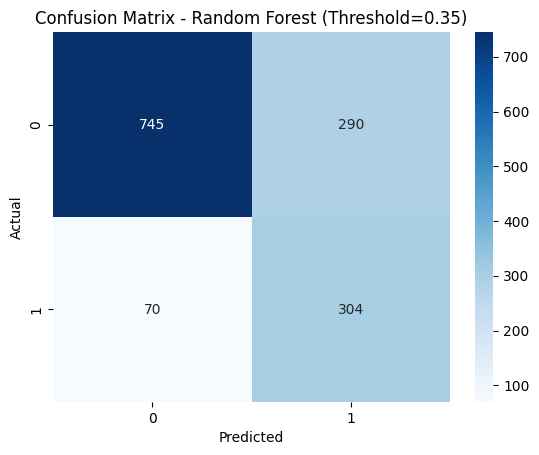

In [74]:
cm = confusion_matrix(y_test, y_pred_thresh)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest (Threshold=0.35)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [75]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.82      0.84      1035
           1       0.57      0.67      0.61       374

    accuracy                           0.78      1409
   macro avg       0.72      0.74      0.73      1409
weighted avg       0.79      0.78      0.78      1409



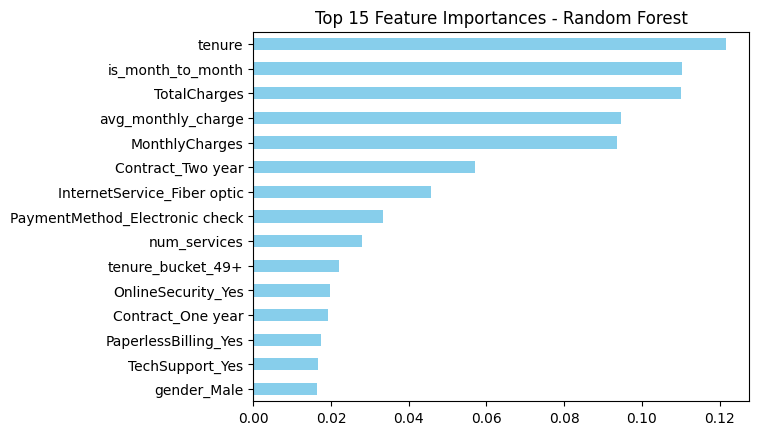

In [79]:
feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feat_importances.sort_values(ascending=False)[:15].plot(kind='barh', color='skyblue')
plt.gca().invert_yaxis()
plt.title("Top 15 Feature Importances - Random Forest")
plt.show()


## KEY INSIGHTS
- Random Forest model captures ~81% of churners (recall) with ROC-AUC of 0.84.
- Feature importance shows tenure, is_month_to_month, and TotalCharges are most influential.

## Model Building Highlights
- **Class Imbalance Handling:** Increased class weight for churners (class 1) to improve model sensitivity.  
- **Threshold Tuning:** Used a 35% probability threshold to better capture churners.  
- **Baseline Model:** Logistic Regression was used as a baseline for comparison.  
- **Model Experimentation:** Tested multiple parameters and models before finalizing.  
- **Final Model:** Best results achieved with **Random Forest Classifier**.